Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
###
### Input delta in folder :  /data
configs = {"analytics_date":"2020-11-16"}
anltdate="2020-11-16"
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [2]:
#sc.stop()

#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
configs = {"analytics_date":"2020-11-16"}
anltdate="2020-11-16"
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-11-16  Afghanistan_nan         0         205.0         445.0   
1  2020-11-16      Albania_nan         0         597.0        1619.0   
2  2020-11-16      Algeria_nan         0         860.0        2571.0   
3  2020-11-16      Andorra_nan         0         147.0         256.0   
4  2020-11-16       Angola_nan         0          77.0         398.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1148.0              43240.0               43377.0  35530000.0   
1        3624.0              27830.0               28297.0   2878445.0   
2        5628.0              67679.0               68434.0  41320000.0   
3         489.0               5872.0                5915.0     77239.0   
4        1018.0              13451.0               13616.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001217   
1                                       0.009669   
2                                       0.001638   
3                                       0.076036   
4                                       0.000409   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.012170                    137.0   
1                                           0.096688                    467.0   
2                                           0.016379                    755.0   
3                                           0.760357                     43.0   
4                                           0.004093                    165.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    3.855896             164.000000   
1                  162.240372             517.714294   
2                   18.272024             804.000000   
3                  556.713562              69.857140   
4                    5.020344             145.428574   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           6.462145      
1                                         251.802628      
2                                          27.241045      
3                                        1266.199707      
4                                           6.194800

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +80 cases a day AVG last 7days 

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-16' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-16           United States_nan          148725.000000   
1   2020-11-16                   Italy_nan           34775.000000   
2   2020-11-16                  Brazil_nan           28425.427734   
3   2020-11-16          United Kingdom_nan           25329.285156   
4   2020-11-16                  Poland_nan           23792.427734   
5   2020-11-16                  Russia_nan           21389.857422   
6   2020-11-16                   Spain_nan           18537.000000   
7   2020-11-16                 Germany_nan           17188.857422   
8   2020-11-16                    Iran_nan           11368.857422   
9   2020-11-16                 Ukraine_nan           11041.142578   
10  2020-11-16                  France_nan           10986.286133   
11  2020-11-16               Argentina_nan            9758.428711   
12  2020-11-16                 Romania_nan            8075.714355   
13  2020-11-16                Colombia_nan            7837.000000   
14  2020-11-16                 Austria_nan            7257.571289   
15  2020-11-16                 Czechia_nan            6469.714355   
16  2020-11-16             Switzerland_nan            6460.285645   
17  2020-11-16                Portugal_nan            5425.285645   
18  2020-11-16             Netherlands_nan            5400.856934   
19  2020-11-16                 Morocco_nan            5199.428711   
20  2020-11-16                 Belgium_nan            5021.428711   
21  2020-11-16                  Jordan_nan            4908.143066   
22  2020-11-16                 Hungary_nan            4477.856934   
23  2020-11-16                  Sweden_nan            4413.428711   
24  2020-11-16                Bulgaria_nan            3298.714355   
25  2020-11-16                 Georgia_nan            3132.142822   
26  2020-11-16                  Serbia_nan            3117.285645   
27  2020-11-16                    Iraq_nan            2943.285645   
28  2020-11-16                  Greece_nan            2501.000000   
29  2020-11-16                 Croatia_nan            2422.714355   
30  2020-11-16                   Nepal_nan            2189.000000   
31  2020-11-16                    Peru_nan            2127.000000   
32  2020-11-16                Slovakia_nan            1610.285767   
33  2020-11-16                 Lebanon_nan            1599.142822   
34  2020-11-16                 Armenia_nan            1559.000000   
35  2020-11-16              Azerbaijan_nan            1468.142822   
36  2020-11-16              Canada_Ontario            1452.285767   
37  2020-11-16               Lithuania_nan            1437.000000   
38  2020-11-16                Slovenia_nan            1411.571411   
39  2020-11-16                   Chile_nan            1387.857178   
40  2020-11-16  Bosnia and Herzegovina_nan            1361.857178   
41  2020-11-16                 Tunisia_nan            1326.428589   
42  2020-11-16               Canada_Quebec            1290.571411   
43  2020-11-16    United Arab Emirates_nan            1171.714233   
44  2020-11-16                 Belarus_nan            1129.428589   
45  2020-11-16         North Macedonia_nan            1041.428589   
46  2020-11-16                  Panama_nan            1018.000000   
47  2020-11-16                 Denmark_nan            1002.142883   
48  2020-11-16                 Moldova_nan             990.428589   
49  2020-11-16              Costa Rica_nan             980.000000   
50  2020-11-16                  Kosovo_nan             883.285706   
51  2020-11-16              Canada_Alberta             832.142883   
52  2020-11-16                   Libya_nan             783.571411   
53  2020-11-16                  Kuwait_nan             728.142883   
54  2020-11-16      West Bank and Gaza_nan             696.142883   
55  2020-11-16                  Israel_nan             642.857117   
56  2020-11-16              Montenegro_nan             624.571411   
57  2020

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-16' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-11-16           United States_nan          148725.000000   
1   2020-11-16                   Italy_nan           34775.000000   
2   2020-11-16                  Brazil_nan           28425.427734   
3   2020-11-16          United Kingdom_nan           25329.285156   
4   2020-11-16                  Poland_nan           23792.427734   
5   2020-11-16                  Russia_nan           21389.857422   
6   2020-11-16                   Spain_nan           18537.000000   
7   2020-11-16                 Germany_nan           17188.857422   
8   2020-11-16                    Iran_nan           11368.857422   
9   2020-11-16                 Ukraine_nan           11041.142578   
10  2020-11-16                  France_nan           10986.286133   
11  2020-11-16               Argentina_nan            9758.428711   
12  2020-11-16                 Romania_nan            8075.714355   
13  2020-11-16                Colombia_nan            7837.000000   
14  2020-11-16                 Austria_nan            7257.571289   
15  2020-11-16                 Czechia_nan            6469.714355   
16  2020-11-16             Switzerland_nan            6460.285645   
17  2020-11-16                Portugal_nan            5425.285645   
18  2020-11-16             Netherlands_nan            5400.856934   
19  2020-11-16                 Morocco_nan            5199.428711   
20  2020-11-16                 Belgium_nan            5021.428711   
21  2020-11-16                  Jordan_nan            4908.143066   
22  2020-11-16                 Hungary_nan            4477.856934   
23  2020-11-16                  Sweden_nan            4413.428711   
24  2020-11-16                Bulgaria_nan            3298.714355   
25  2020-11-16                 Georgia_nan            3132.142822   
26  2020-11-16                  Serbia_nan            3117.285645   
27  2020-11-16                    Iraq_nan            2943.285645   
28  2020-11-16                  Greece_nan            2501.000000   
29  2020-11-16                 Croatia_nan            2422.714355   
..         ...                         ...                    ...   
40  2020-11-16  Bosnia and Herzegovina_nan            1361.857178   
41  2020-11-16                 Tunisia_nan            1326.428589   
42  2020-11-16               Canada_Quebec            1290.571411   
43  2020-11-16    United Arab Emirates_nan            1171.714233   
44  2020-11-16                 Belarus_nan            1129.428589   
45  2020-11-16         North Macedonia_nan            1041.428589   
46  2020-11-16                  Panama_nan            1018.000000   
47  2020-11-16                 Denmark_nan            1002.142883   
48  2020-11-16                 Moldova_nan             990.428589   
49  2020-11-16              Costa Rica_nan             980.000000   
50  2020-11-16                  Kosovo_nan             883.285706   
51  2020-11-16              Canada_Alberta             832.142883   
52  2020-11-16                   Libya_nan             783.571411   
53  2020-11-16                  Kuwait_nan             728.142883   
54  2020-11-16      West Bank and Gaza_nan             696.142883   
55  2020-11-16                  Israel_nan             642.857117   
56  2020-11-16              Montenegro_nan             624.571411   
57  2020-11-16              Kyrgyzstan_nan             594.857117   
58  2020-11-16              Luxembourg_nan             589.285706   
59  2020-11-16                Paraguay_nan             569.285706   
60  2020-11-16                  Norway_nan             528.857117   
61  2020-11-16                 Albania_nan             517.714294   
62  2020-11-16     Canada_British Columbia             467.142853   
63  2020-11-16             Canada_Manitoba             402.428558   
64  2020-11-16                 Ireland_nan             358.428558   
65  2020-11-16                  Latvia_nan             350.285706   
66  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-16' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-11-16           United States_nan          148725.000000   
1   2020-11-16                   Italy_nan           34775.000000   
2   2020-11-16          United Kingdom_nan           25329.285156   
3   2020-11-16                  Poland_nan           23792.427734   
4   2020-11-16                   Spain_nan           18537.000000   
5   2020-11-16                 Germany_nan           17188.857422   
6   2020-11-16                 Ukraine_nan           11041.142578   
7   2020-11-16               Argentina_nan            9758.428711   
8   2020-11-16                 Romania_nan            8075.714355   
9   2020-11-16                 Austria_nan            7257.571289   
10  2020-11-16                 Czechia_nan            6469.714355   
11  2020-11-16             Switzerland_nan            6460.285645   
12  2020-11-16                Portugal_nan            5425.285645   
13  2020-11-16             Netherlands_nan            5400.856934   
14  2020-11-16                 Belgium_nan            5021.428711   
15  2020-11-16                  Jordan_nan            4908.143066   
16  2020-11-16                 Hungary_nan            4477.856934   
17  2020-11-16                  Sweden_nan            4413.428711   
18  2020-11-16                Bulgaria_nan            3298.714355   
19  2020-11-16                 Georgia_nan            3132.142822   
20  2020-11-16                  Serbia_nan            3117.285645   
21  2020-11-16                  Greece_nan            2501.000000   
22  2020-11-16                 Croatia_nan            2422.714355   
23  2020-11-16                Slovakia_nan            1610.285767   
24  2020-11-16                 Lebanon_nan            1599.142822   
25  2020-11-16                 Armenia_nan            1559.000000   
26  2020-11-16               Lithuania_nan            1437.000000   
27  2020-11-16                Slovenia_nan            1411.571411   
28  2020-11-16  Bosnia and Herzegovina_nan            1361.857178   
29  2020-11-16         North Macedonia_nan            1041.428589   
30  2020-11-16                  Panama_nan            1018.000000   
31  2020-11-16                 Denmark_nan            1002.142883   
32  2020-11-16                 Moldova_nan             990.428589   
33  2020-11-16              Costa Rica_nan             980.000000   
34  2020-11-16                  Kosovo_nan             883.285706   
35  2020-11-16              Canada_Alberta             832.142883   
36  2020-11-16                  Kuwait_nan             728.142883   
37  2020-11-16              Montenegro_nan             624.571411   
38  2020-11-16              Luxembourg_nan             589.285706   
39  2020-11-16                 Albania_nan             517.714294   
40  2020-11-16             Canada_Manitoba             402.428558   
41  2020-11-16                  Latvia_nan             350.285706   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          629.043274          133045.0   
1                                          804.976868           33977.0   
2                                          533.729675           24962.0   
3                                          877.024780           21854.0   
4                                          556.189453               0.0   
5                                          290.667969            3213.0   
6                                          353.010132           10940.0   
7                                          302.877380            5645.0   
8                                          578.904236            7096.0   
9                                         1151.734253            5665.0   
10                                         846.134033            1887.0   
11                                        1055.355835               0.0   
12                                         738.134094            60

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-16' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-11-16                Brazil_nan           28425.427734   
1   2020-11-16                Russia_nan           21389.857422   
2   2020-11-16                  Iran_nan           11368.857422   
3   2020-11-16                France_nan           10986.286133   
4   2020-11-16              Colombia_nan            7837.000000   
5   2020-11-16               Morocco_nan            5199.428711   
6   2020-11-16            Azerbaijan_nan            1468.142822   
7   2020-11-16            Canada_Ontario            1452.285767   
8   2020-11-16               Tunisia_nan            1326.428589   
9   2020-11-16             Canada_Quebec            1290.571411   
10  2020-11-16  United Arab Emirates_nan            1171.714233   
11  2020-11-16               Belarus_nan            1129.428589   
12  2020-11-16                 Libya_nan             783.571411   
13  2020-11-16    West Bank and Gaza_nan             696.142883   
14  2020-11-16            Kyrgyzstan_nan             594.857117   
15  2020-11-16                Norway_nan             528.857117   
16  2020-11-16   Canada_British Columbia             467.142853   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          187.221436           14134.0   
1                                          207.237366           22313.0   
2                                          189.496750           12543.0   
3                                          219.757111               0.0   
4                                          216.125168            7112.0   
5                                          197.712326            4966.0   
6                                          203.111664            2259.0   
7                                          139.547012            1407.0   
8                                          157.480072            1065.0   
9                                          212.940491            1211.0   
10                                         174.510635            1210.0   
11                                         167.323212            1315.0   
12                                         159.649750             974.0   
13                                         214.521896             864.0   
14                                         127.647934            1030.0   
15                                         138.211685               0.0   
16                                         128.235291               0.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        81511.0      198978.0            5863093.0  212559008.0   
1        66471.0      149729.0            1910149.0  144500000.0   
2        35483.0       79582.0             762068.0   83993000.0   
3            0.0       76904.0            1867721.0   69990000.0   
4        24734.0       54859.0            1198746.0   50765952.0   
5        16356.0       36396.0             293177.0   36817128.0   
6         5472.0       10277.0              75688.0   10119557.0   
7         4226.0       10166.0              97371.0   14570000.0   
8         4298.0        9285.0              80404.0   11791968.0   
9         3960.0        9034.0             123854.0    8485000.0   
10        3610.0        8202.0             150345.0    9400000.0   
11        3730.0        7906.0             114185.0    9449974.0   
12        1798.0        5485.0              73602.0    6871292.0   
13        2247.0        4873.0              63031.0    4543126.0   
14        2096.0        4164.0              66983.0    6524195.0   
15        1206.0        3702.0              28434.0    5357000.0   
16         617.0        3270.0              20986.0    5100000.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.275834           
1                                            0.132190           
2                               

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-16' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date        region  delta_roling_7day_AVG  \
0  2020-11-16      Iraq_nan            2943.285645   
1  2020-11-16     Nepal_nan            2189.000000   
2  2020-11-16      Peru_nan            2127.000000   
3  2020-11-16     Chile_nan            1387.857178   
4  2020-11-16    Israel_nan             642.857117   
5  2020-11-16  Paraguay_nan             569.285706   
6  2020-11-16   Ireland_nan             358.428558   
7  2020-11-16      Oman_nan             321.285706   
8  2020-11-16     Qatar_nan             226.000000   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         107.671806            2237.0   
1                                         104.593857            1477.0   
2                                          90.591286            2249.0   
3                                         101.828972            1597.0   
4                                         103.305786             402.0   
5                                         112.069603             509.0   
6                                         101.870186             377.0   
7                                          97.023293             947.0   
8                                         110.234070             215.0   

   3_day_change  7_day_change  confirmed_yesterday  population  \
0        7346.0       20603.0             519152.0  38270000.0   
1        5534.0       15323.0             209776.0  29300000.0   
2        6893.0       14889.0             934899.0  32870710.0   
3        4835.0        9715.0             531273.0  19081012.0   
4        1582.0        4500.0             323741.0   8712000.0   
5        1921.0        3985.0              71574.0   7111652.0   
6        1271.0        2509.0              67903.0   4925877.0   
7         947.0        2249.0             120389.0   4636000.0   
8         653.0        1582.0             135785.0   2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.135655                   3499.0   
1                                           0.071596                   2802.0   
2                                           0.284417                   2028.0   
3                                           0.278431                   1240.0   
4                                           0.371605                    729.0   
5                                           0.100645                    597.0   
6                                           0.137852                    348.0   
7                                           0.259685                     51.0   
8                                           0.473080                    233.0   

   delta_new_cases_per_1M_hab  
0                   91.429321  
1                   95.631401  
2                   61.696262  
3                   64.986069  
4                   83.677689  
5                   83.946739  
6                   70.647316  
7                   11.000863  
8                   81.177429

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-16' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-16            Korea, South_nan             173.714279   
1   2020-11-16             El Salvador_nan             173.285721   
2   2020-11-16             Afghanistan_nan             164.000000   
3   2020-11-16                 Nigeria_nan             151.142853   
4   2020-11-16                   Ghana_nan             145.857147   
5   2020-11-16                  Angola_nan             145.428574   
6   2020-11-16                 Bolivia_nan             110.142860   
7   2020-11-16              Mozambique_nan              97.142860   
8   2020-11-16                 Uruguay_nan              73.714287   
9   2020-11-16                Botswana_nan              55.714287   
10  2020-11-16                Zimbabwe_nan              42.571430   
11  2020-11-16                    Cuba_nan              41.857143   
12  2020-11-16                Cameroon_nan              38.714287   
13  2020-11-16           Cote d'Ivoire_nan              20.571428   
14  2020-11-16                 Iceland_nan              15.857142   
15  2020-11-16             China_Hong Kong              12.000000   
16  2020-11-16            Burkina Faso_nan              10.285714   
17  2020-11-16               Nicaragua_nan              10.000000   
18  2020-11-16                 Vietnam_nan               9.714286   
19  2020-11-16                   Niger_nan               9.142858   
20  2020-11-16               Singapore_nan               9.000000   
21  2020-11-16                Thailand_nan               5.000000   
22  2020-11-16   Australia_New South Wales               4.142857   
23  2020-11-16   Australia_South Australia               4.142857   
24  2020-11-16                 Taiwan*_nan               3.571429   
25  2020-11-16              China_Shanghai               3.285714   
26  2020-11-16             China_Guangdong               2.714286   
27  2020-11-16             New Zealand_nan               2.142857   
28  2020-11-16               China_Sichuan               1.857143   
29  2020-11-16               China_Tianjin               1.857143   
30  2020-11-16               China_Shaanxi               1.285714   
31  2020-11-16        Australia_Queensland               1.142857   
32  2020-11-16  United Kingdom_Isle of Man               0.857143   
33  2020-11-16                Cambodia_nan               0.714286   
34  2020-11-16                China_Fujian               0.714286   
35  2020-11-16              China_Liaoning               0.428571   
36  2020-11-16                China_Yunnan               0.428571   
37  2020-11-16               China_Beijing               0.285714   
38  2020-11-16                 China_Henan               0.285714   
39  2020-11-16        China_Inner Mongolia               0.285714   
40  2020-11-16               China_Jiangsu               0.285714   
41  2020-11-16                 China_Anhui               0.142857   
42  2020-11-16                 China_Gansu               0.142857   
43  2020-11-16                 China_Hubei               0.142857   
44  2020-11-16                China_Shanxi               0.142857   
45  2020-11-16              China_Zhejiang               0.142857   
46  2020-11-16          Australia_Victoria               0.000000   
47  2020-11-16             China_Chongqing               0.000000   
48  2020-11-16               China_Guangxi               0.000000   
49  2020-11-16               China_Guizhou               0.000000   
50  2020-11-16                China_Hainan               0.000000   
51  2020-11-16                 China_Hebei               0.000000   
52  2020-11-16          China_Heilongjiang               0.000000   
53  2020-11-16                 China_Hunan               0.000000   
54  2020-11-16               China_Jiangxi               0.000000   
55  2020-11-16                 China_Jilin               0.000000   
56  2020-11-16                 China_Macau               0.000000   
57  2020

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-16' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                     region  delta_roling_7day_AVG  \
0   2020-11-16           Korea, South_nan             173.714279   
1   2020-11-16            El Salvador_nan             173.285721   
2   2020-11-16            Afghanistan_nan             164.000000   
3   2020-11-16                Nigeria_nan             151.142853   
4   2020-11-16                  Ghana_nan             145.857147   
5   2020-11-16                 Angola_nan             145.428574   
6   2020-11-16                Bolivia_nan             110.142860   
7   2020-11-16             Mozambique_nan              97.142860   
8   2020-11-16                Uruguay_nan              73.714287   
9   2020-11-16               Botswana_nan              55.714287   
10  2020-11-16               Zimbabwe_nan              42.571430   
11  2020-11-16                   Cuba_nan              41.857143   
12  2020-11-16               Cameroon_nan              38.714287   
13  2020-11-16          Cote d'Ivoire_nan              20.571428   
14  2020-11-16                Iceland_nan              15.857142   
15  2020-11-16            China_Hong Kong              12.000000   
16  2020-11-16           Burkina Faso_nan              10.285714   
17  2020-11-16              Nicaragua_nan              10.000000   
18  2020-11-16                Vietnam_nan               9.714286   
19  2020-11-16                  Niger_nan               9.142858   
20  2020-11-16              Singapore_nan               9.000000   
21  2020-11-16               Thailand_nan               5.000000   
22  2020-11-16  Australia_New South Wales               4.142857   
23  2020-11-16  Australia_South Australia               4.142857   
24  2020-11-16                Taiwan*_nan               3.571429   
25  2020-11-16             China_Shanghai               3.285714   
26  2020-11-16            China_Guangdong               2.714286   
27  2020-11-16            New Zealand_nan               2.142857   
28  2020-11-16              China_Sichuan               1.857143   
29  2020-11-16              China_Tianjin               1.857143   
..         ...                        ...                    ...   
34  2020-11-16               China_Fujian               0.714286   
35  2020-11-16             China_Liaoning               0.428571   
36  2020-11-16               China_Yunnan               0.428571   
37  2020-11-16              China_Beijing               0.285714   
38  2020-11-16                China_Henan               0.285714   
39  2020-11-16       China_Inner Mongolia               0.285714   
40  2020-11-16              China_Jiangsu               0.285714   
41  2020-11-16                China_Anhui               0.142857   
42  2020-11-16                China_Gansu               0.142857   
43  2020-11-16                China_Hubei               0.142857   
44  2020-11-16               China_Shanxi               0.142857   
45  2020-11-16             China_Zhejiang               0.142857   
46  2020-11-16         Australia_Victoria               0.000000   
47  2020-11-16            China_Chongqing               0.000000   
48  2020-11-16              China_Guangxi               0.000000   
49  2020-11-16              China_Guizhou               0.000000   
50  2020-11-16               China_Hainan               0.000000   
51  2020-11-16                China_Hebei               0.000000   
52  2020-11-16         China_Heilongjiang               0.000000   
53  2020-11-16                China_Hunan               0.000000   
54  2020-11-16              China_Jiangxi               0.000000   
55  2020-11-16                China_Jilin               0.000000   
56  2020-11-16                China_Macau               0.000000   
57  2020-11-16              China_Ningxia               0.000000   
58  2020-11-16              China_Qinghai               0.000000   
59  2020-11-16             China_Shandong               0.000000   
60  2020-11-16                China_Tibet               0.000000  

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-16' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-16' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-16' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [18]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-11-16' and population = 10000000 order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                   Canada_Prince Edward Island
19                                  Canada_Yukon
20                  Central African Republic_nan
21                                      Chad_nan
22                                   Comoros_nan
23                       Congo (Brazzaville)_nan
24                          Congo (Kinshasa)_nan
25                         Denmark_Faroe Islands
26                             Denmark_Greenland
27                          Diamond Princess_nan
28                                  Djibouti_nan
29                                  Dominica_nan
..                                           ...
50                                   Lesotho_nan
51                                   Liberia_nan
52                                MS Zaandam_nan
53                                Madagascar_nan
54                                    Malawi_nan
55                                  Maldives_nan
56                                      Mali_nan
57                          Marshall Islands_nan
58                                Mauritania_nan
59                                 Mauritius_nan
60                                  Mongolia_nan
61                                   Namibia_nan
62                             Netherlands_Aruba
63  Netherlands_Bonaire, Sint Eustatius and Saba
64                           Netherlands_Curacao
65                      Netherlands_Sint Maarten
66                          Papua New Guinea_nan
67                                    Rwanda_nan
68                     Saint Kitts and Nevis_nan
69                               Saint Lucia_nan
70          Saint Vincent and the Grenadines_nan
71                     Sao Tome and Principe_nan
72                                   Senegal_nan
73                                Seychelles_nan
74                              Sierra Leone_nan
75                           Solomon Islands_nan
76                                   Somalia_nan
77                               South Sudan_nan
78                                     Sudan_nan
79                                  Suriname_nan

[80 rows x 1 columns]

In [19]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-11-16' and region > 'Suriname_nan' and
     population = 10000000 order by region asc

region
0                                 Syria_nan
1                            Tajikistan_nan
2                              Tanzania_nan
3                           Timor-Leste_nan
4                                  Togo_nan
5                   Trinidad and Tobago_nan
6                   United Kingdom_Anguilla
7                    United Kingdom_Bermuda
8     United Kingdom_British Virgin Islands
9             United Kingdom_Cayman Islands
10  United Kingdom_Turks and Caicos Islands
11                              Vanuatu_nan
12                       Western Sahara_nan
13                                Yemen_nan
14                               Zambia_nan

In [20]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [21]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-01' and  date <= '2020-11-16' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [22]:
sc.stop()

In [23]:
%matplotlib inline
##%matplotlib notebook

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


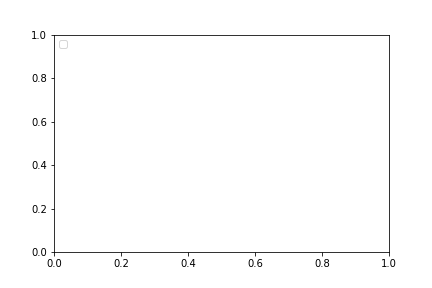

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


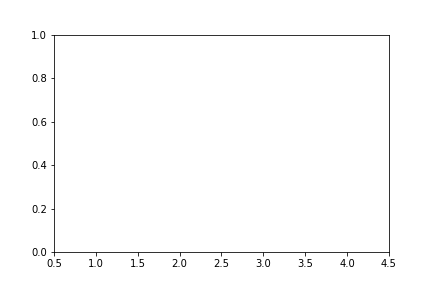

In [25]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


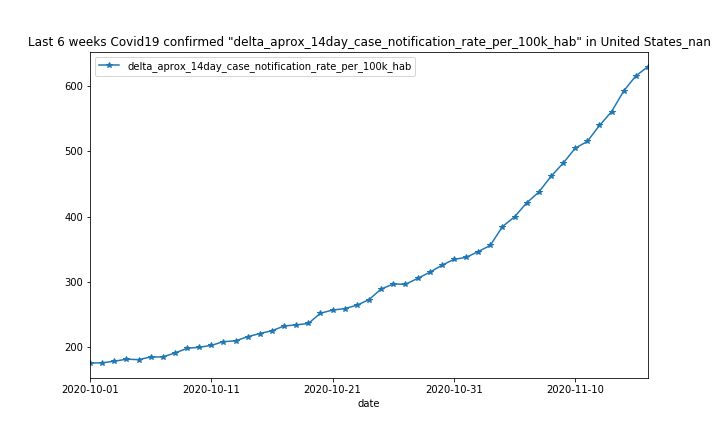

In [27]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


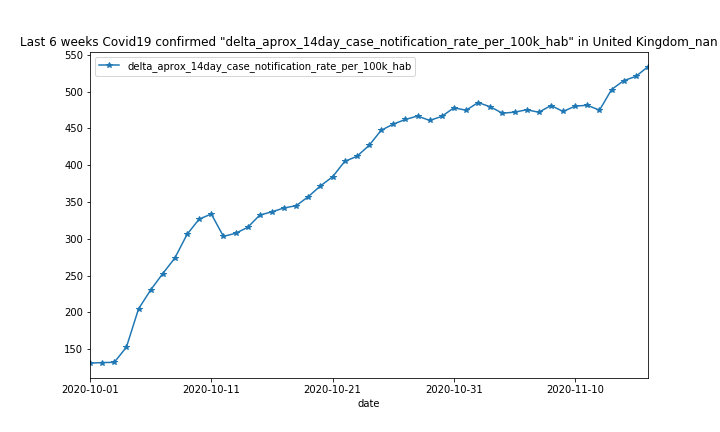

In [28]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


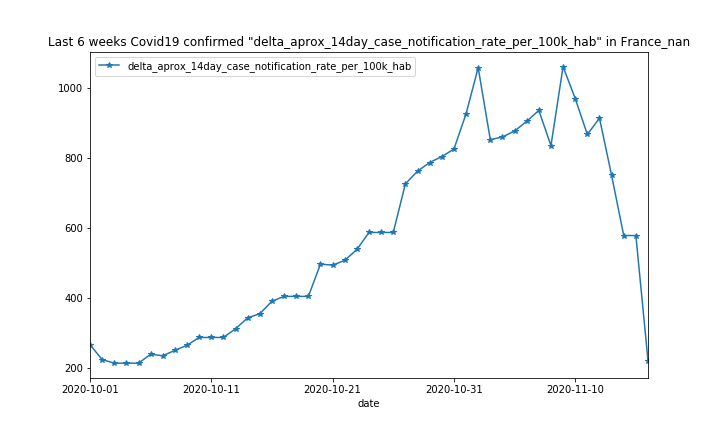

In [29]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


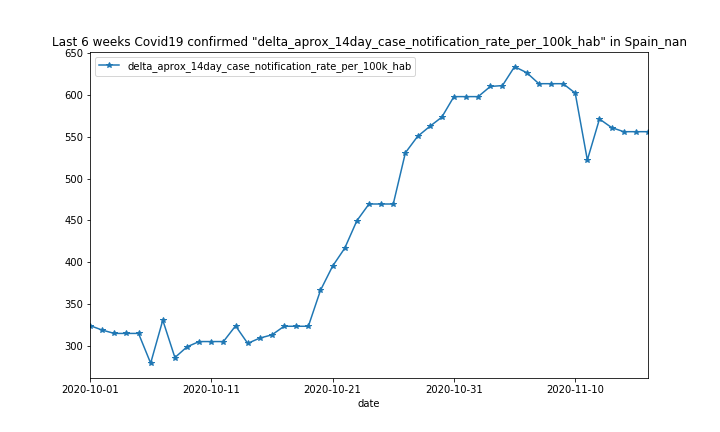

In [30]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


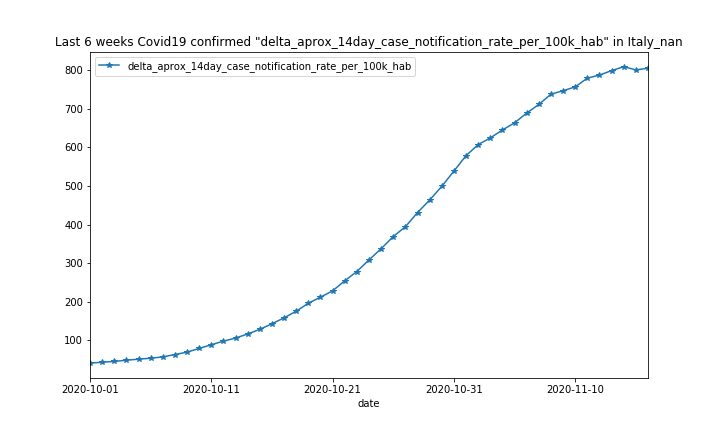

In [31]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


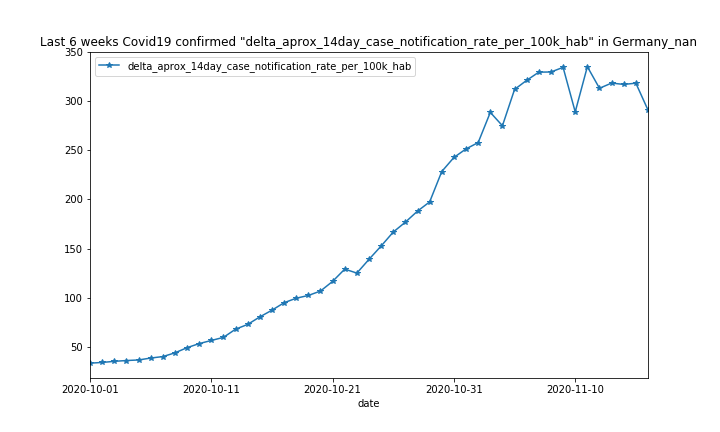

In [32]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


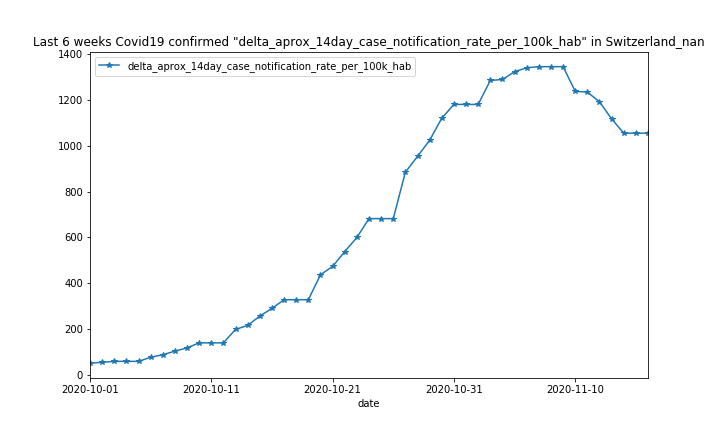

In [33]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


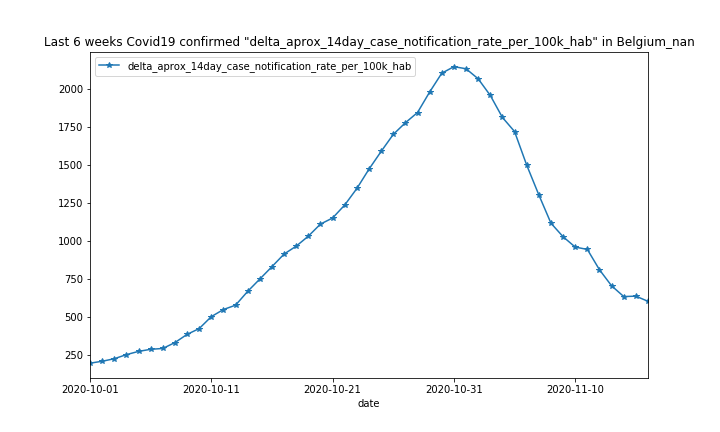

In [34]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


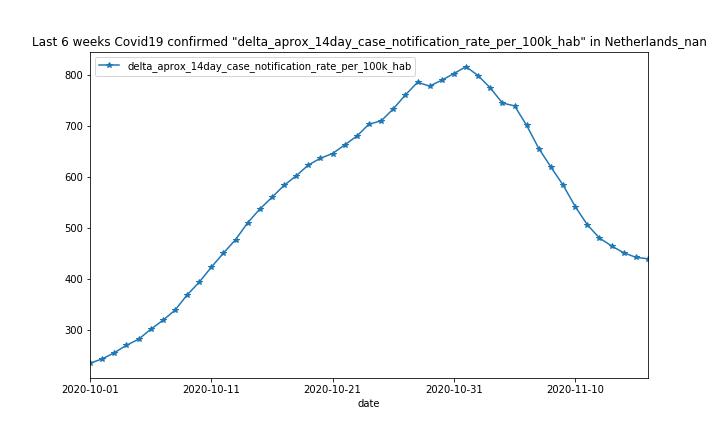

In [35]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


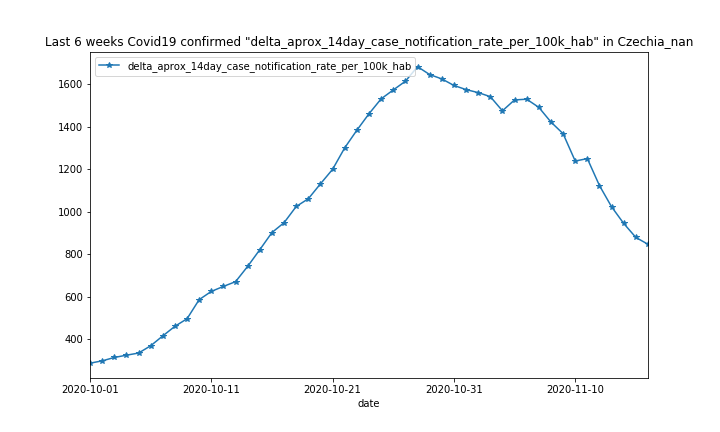

In [36]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


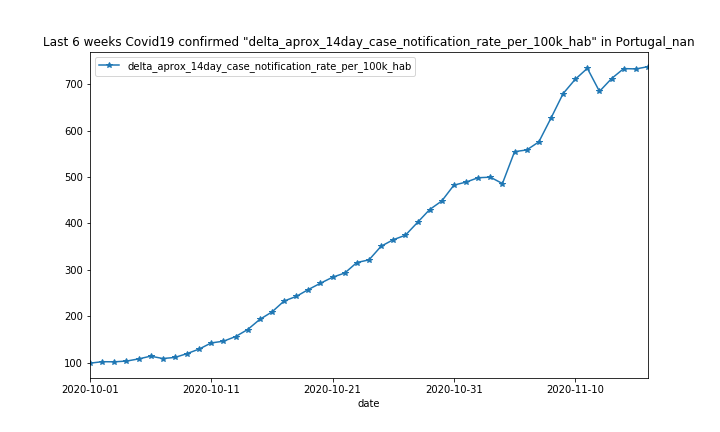

In [37]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [38]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


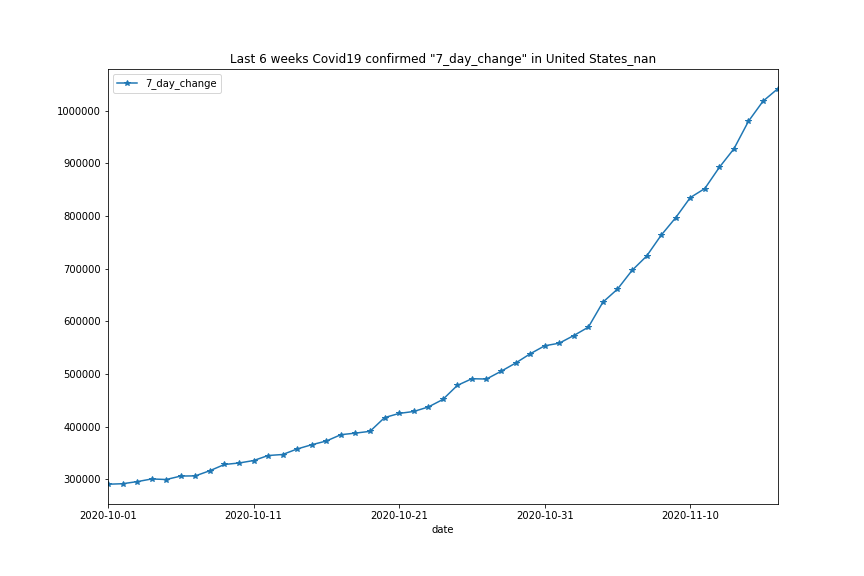

In [39]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


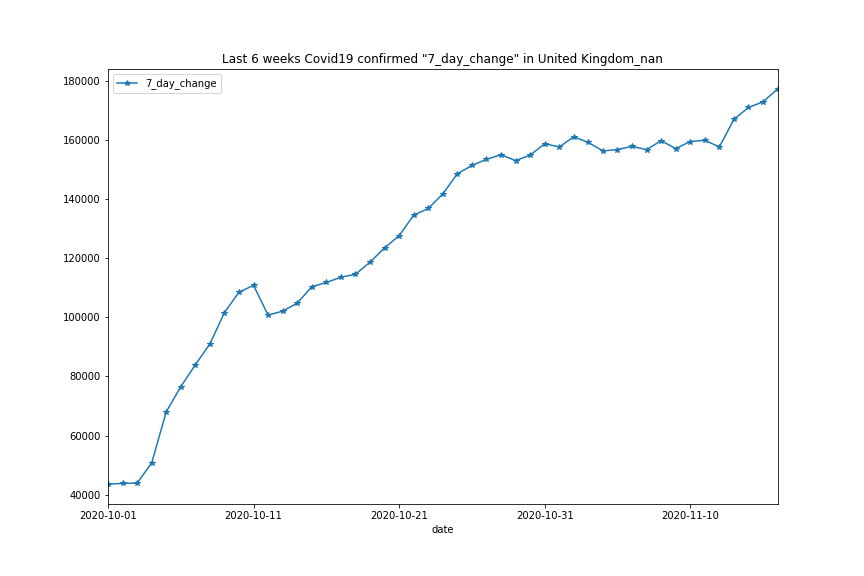

In [40]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


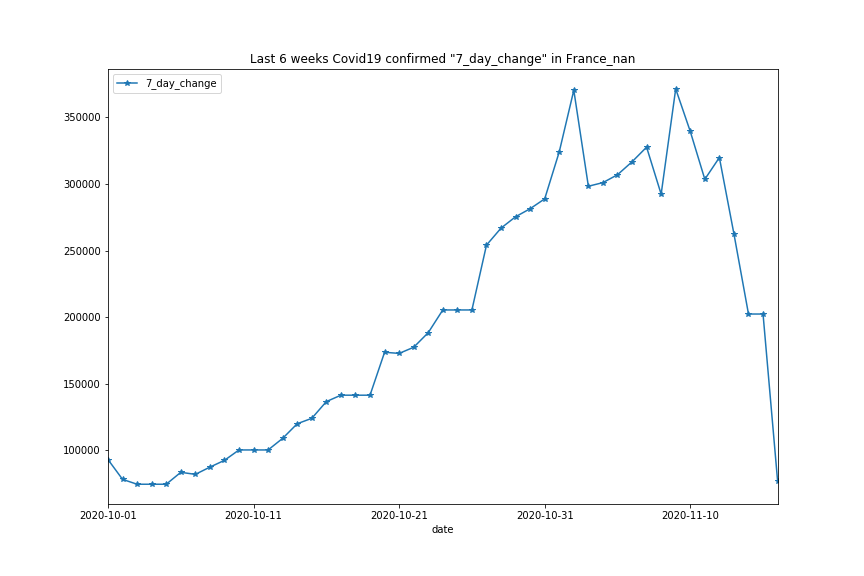

In [41]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


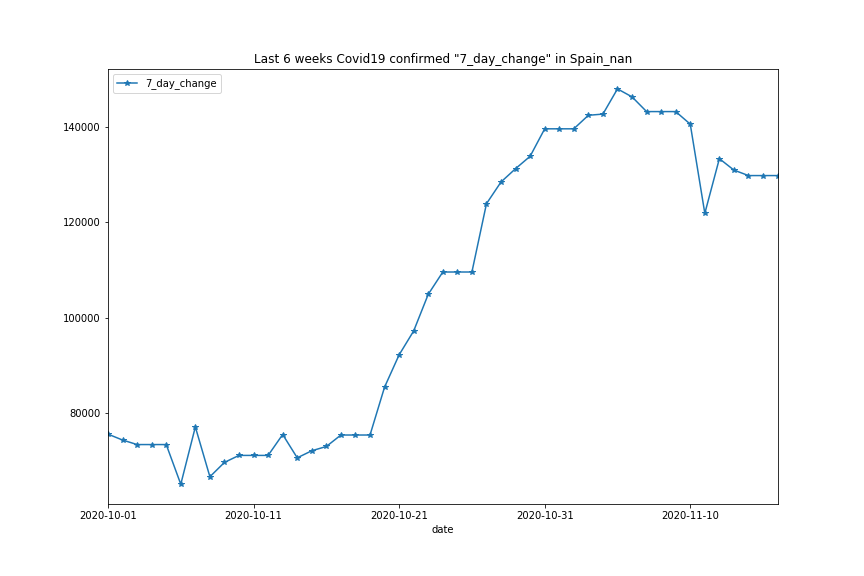

In [42]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


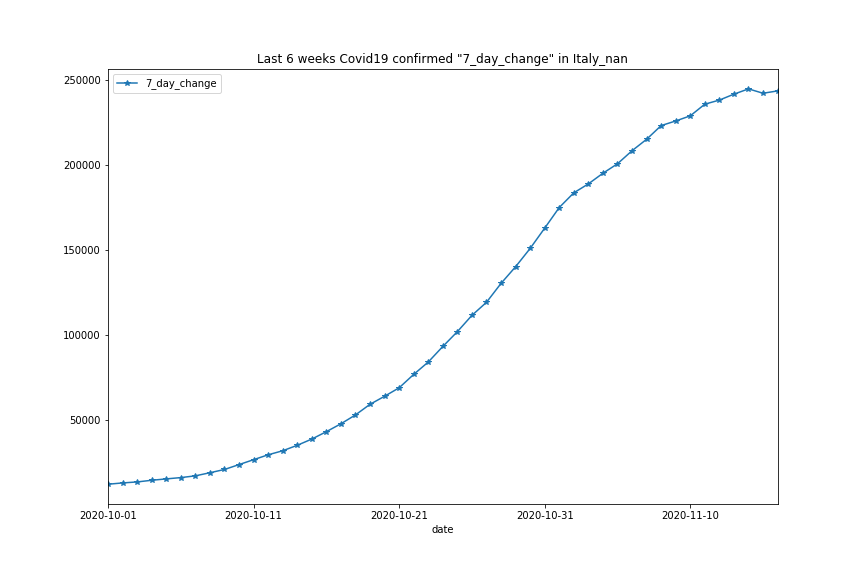

In [43]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


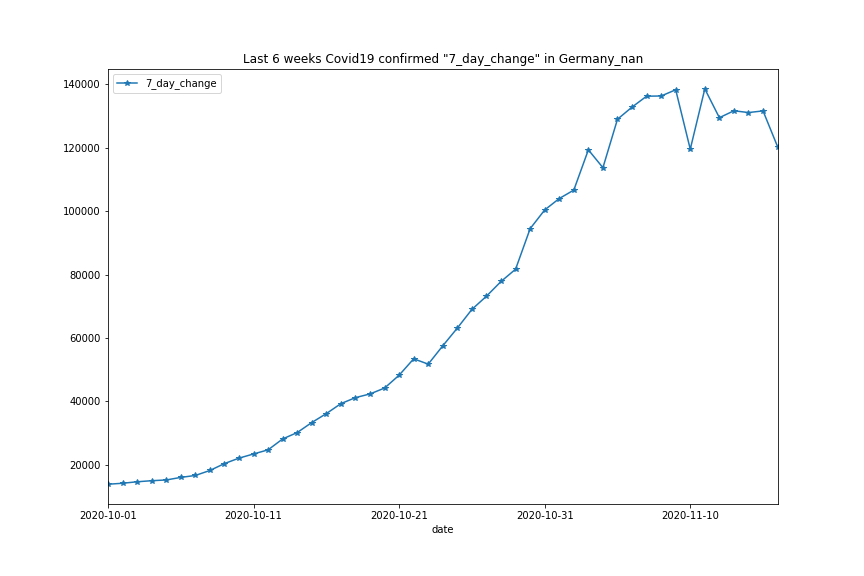

In [44]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


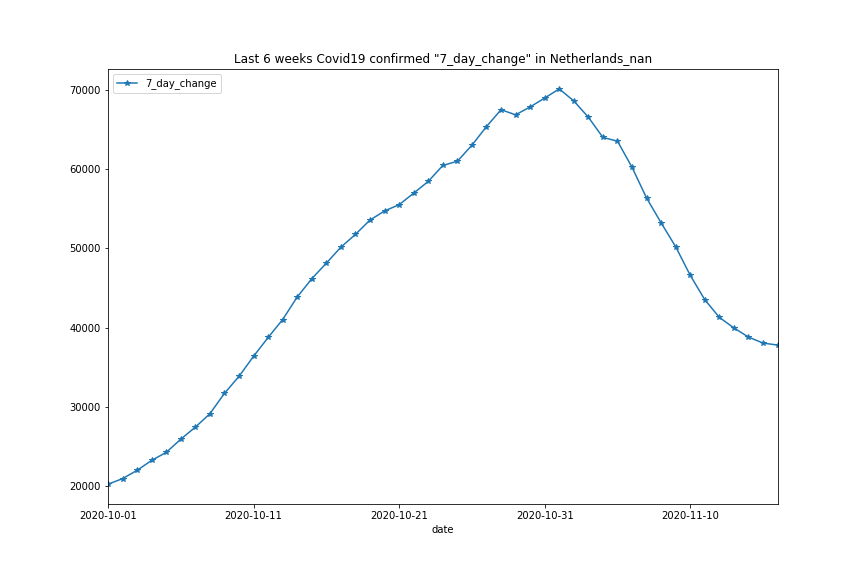

In [45]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


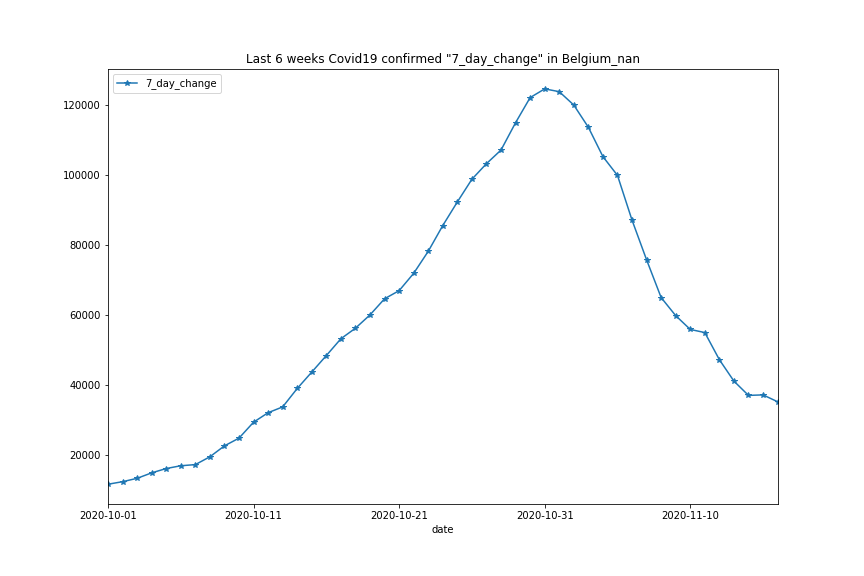

In [46]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


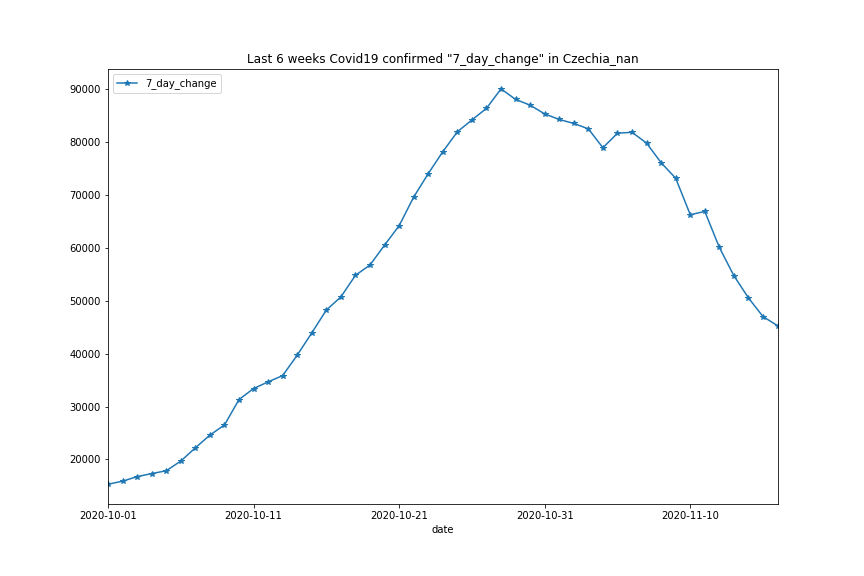

In [47]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


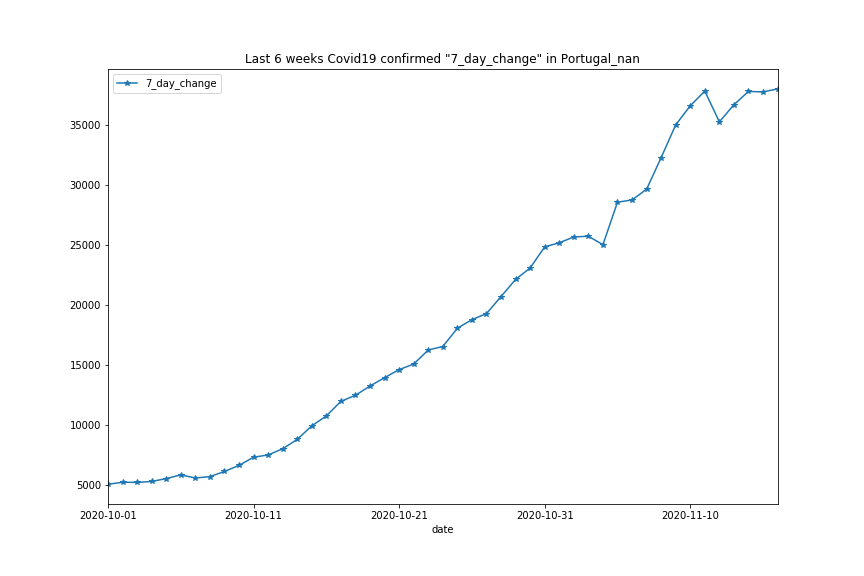

In [48]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [49]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


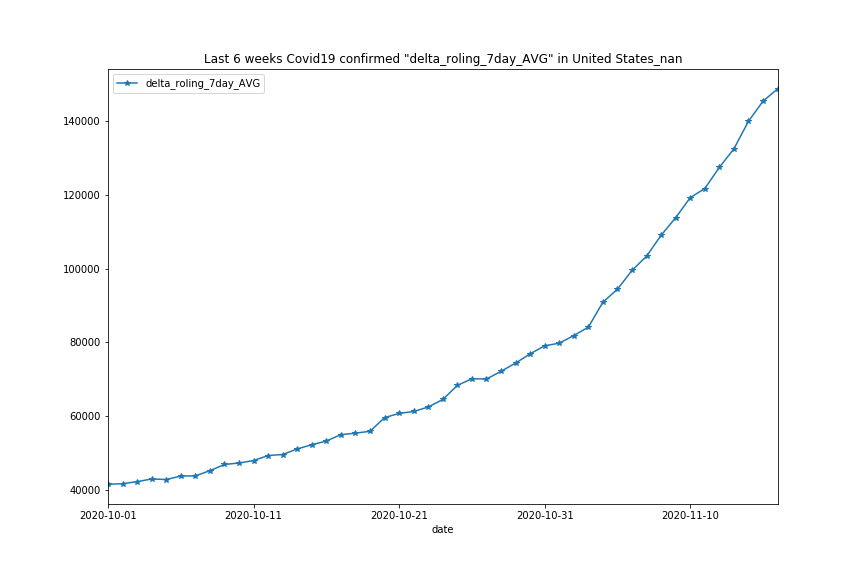

In [50]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


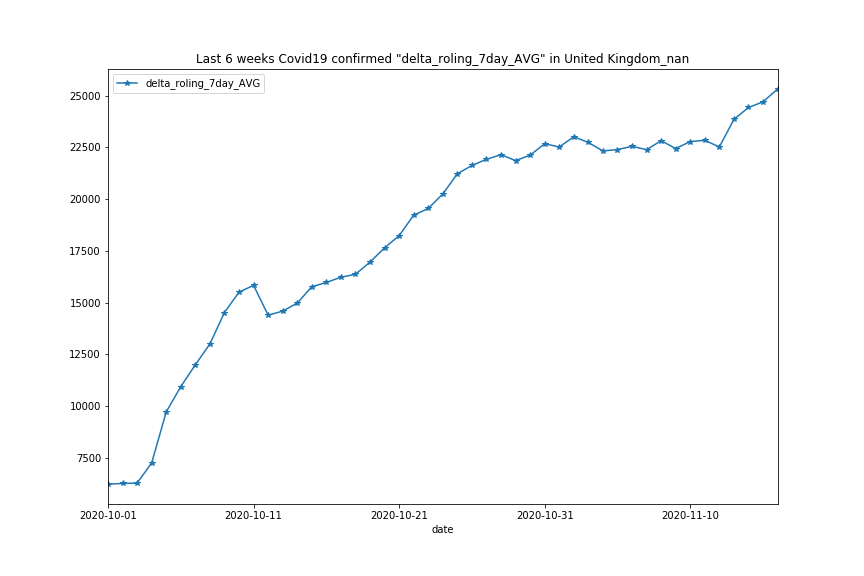

In [51]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


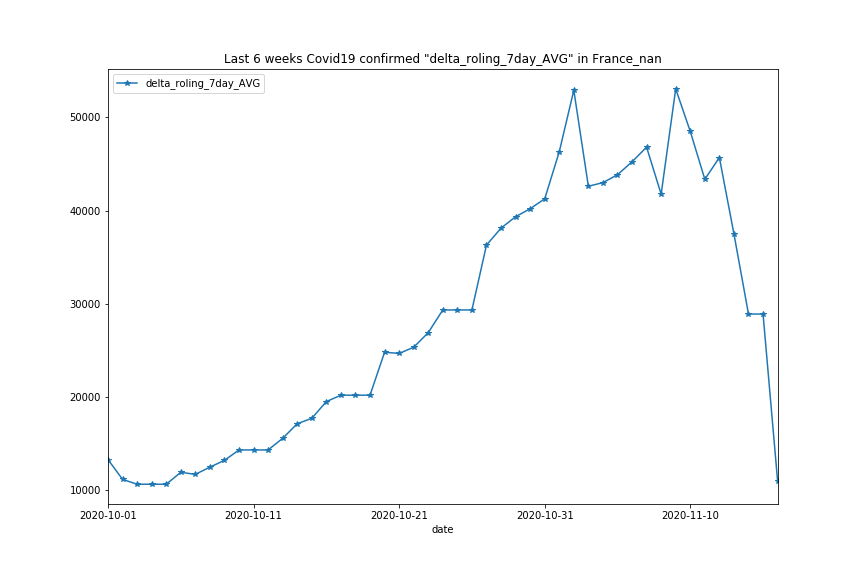

In [52]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


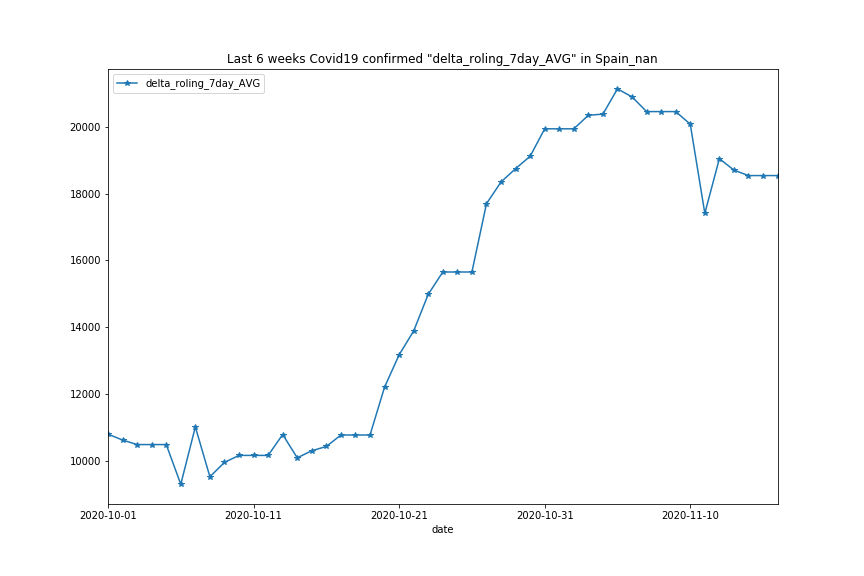

In [53]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


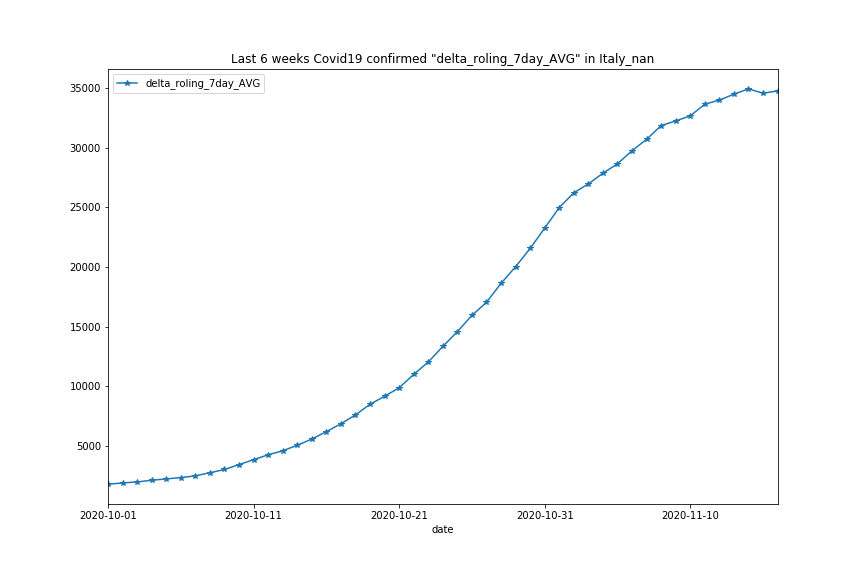

In [54]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


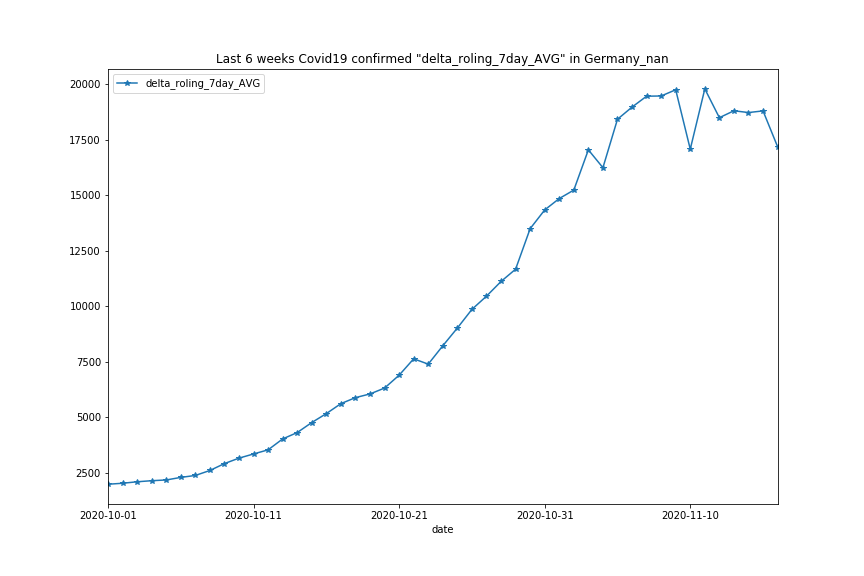

In [55]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


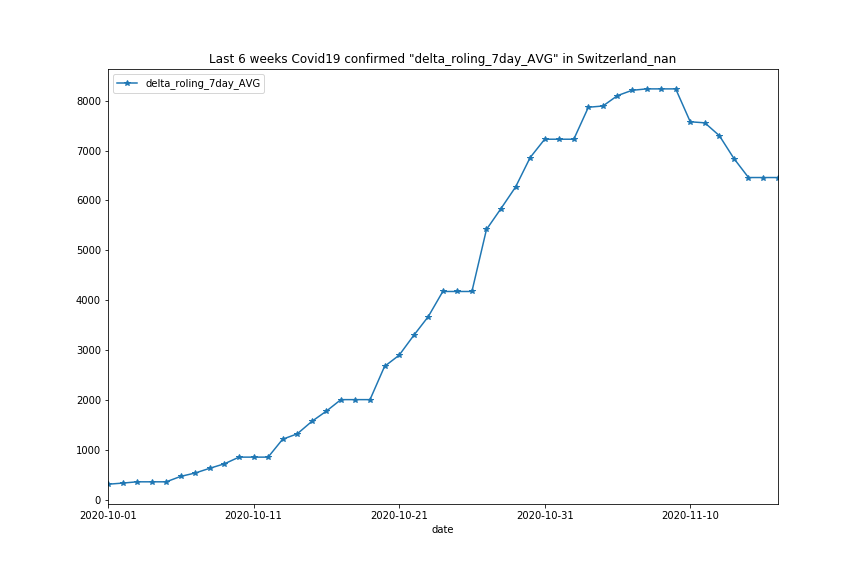

In [56]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


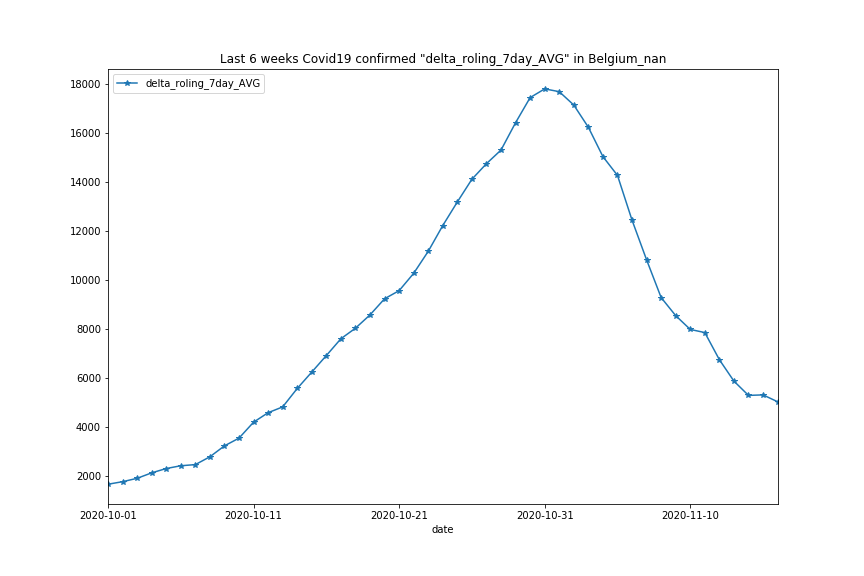

In [57]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


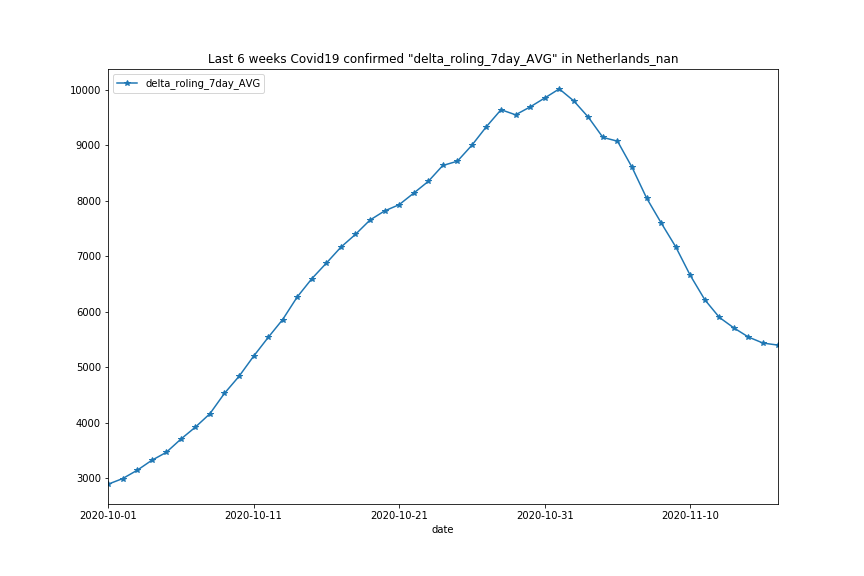

In [58]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


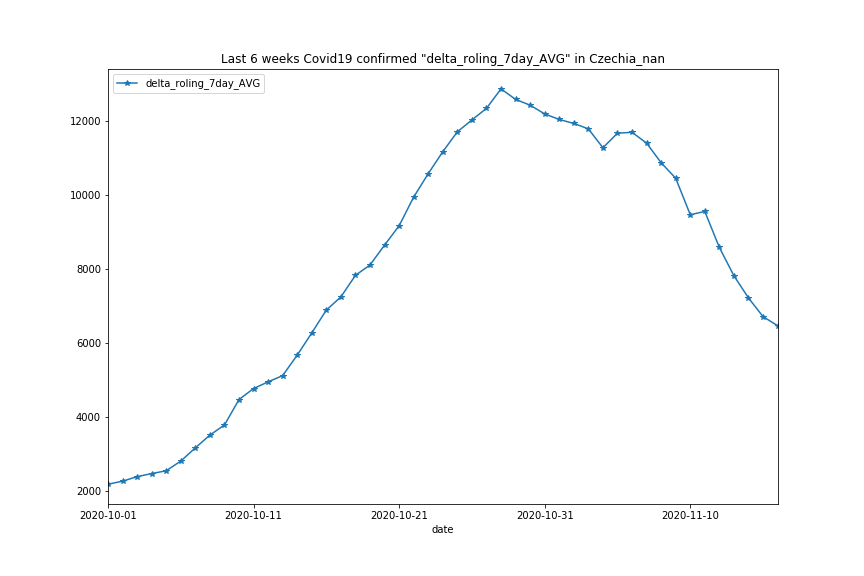

In [59]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


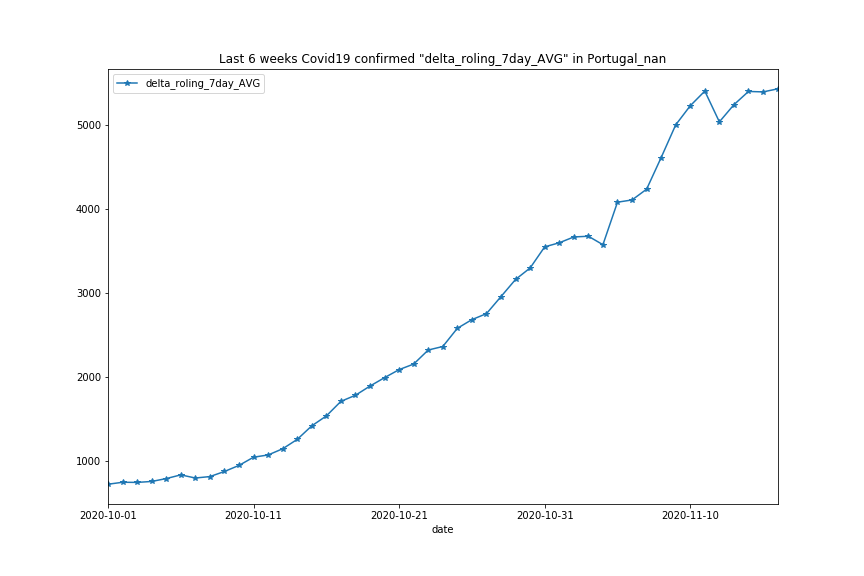

In [60]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [61]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [62]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
